# IRIS DATA SET

### Import All the Essential libraries

In [3]:
import numpy as np                  # to deal with arrays
import matplotlib.pyplot as plt     # to plot the graphs
import seaborn as sns               # Data visualization tool
import pandas as pd                 # to manuplate the data

### Load the Dataset

In [4]:
columns = ['sepal length','sepal width','petal length','petal width','class']
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df =pd.read_csv(url, names=columns)

### Understand the dataset

In [9]:
df.head(20)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


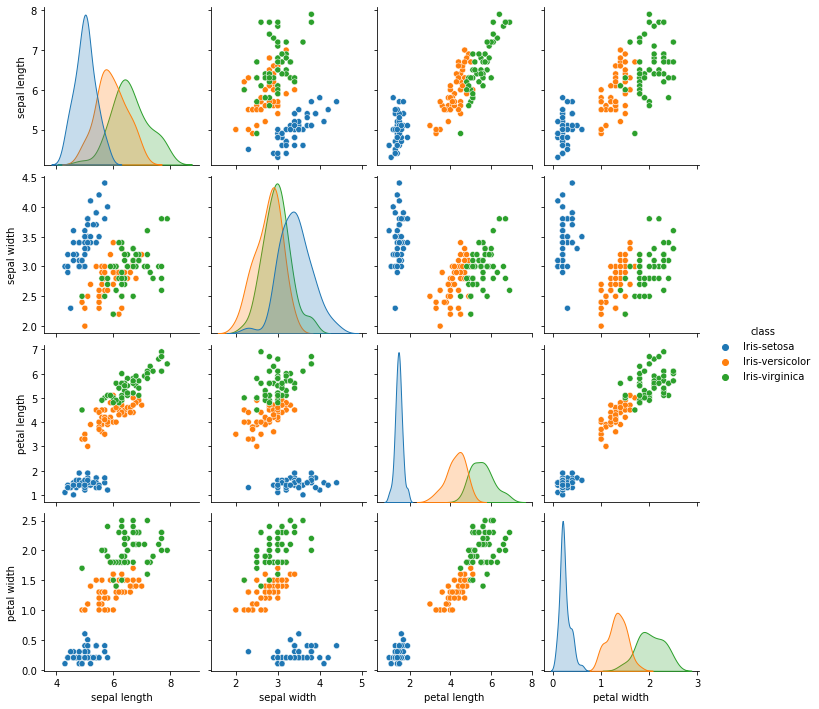

In [6]:
sns.pairplot(df, hue='class')

### Seperate INPUT and OUTPUT columns

In [9]:
data = df.values

x = data[:,0:4]
y = data[:,4]

### Splitting Data into TRAINING & TESTING

In [10]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## MODEL-1 
### Support vector machine Algorithm

In [23]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [27]:
# Calculate the Accuracy
prediction1 = model_svc.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction1))

1.0


## MODEL-2
### Logistic Regression 

In [28]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)

C:\Users\syamc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
# Calculate the Accuracy
prediction2 = model_LR.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction2)*100)

96.66666666666667


## MODEL-3
### DesicionTree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
# Calculate the Accuracy
prediction3 = model_DTC.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction3))

0.9333333333333333


## Report

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## Testing With New Data

In [38]:
x_new = np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,1.9]])
# Prediction of the species from the input vector
prediction = model_svc.predict(x_new)
print("Prediction of new species: {}".format(prediction))

Prediction of new species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']
